In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ratings_df = pd.read_csv('ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='ISO-8859-1')
users_df = pd.read_csv('users.dat', sep='::', engine='python', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='ISO-8859-1')
movies_df = pd.read_csv('movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')

In [7]:
n_ratings = len(ratings_df)
n_movies = ratings_df['MovieID'].nunique()
n_users = ratings_df['UserID'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 1000209
Number of unique movieId's: 3706
Number of unique users: 6040
Average number of ratings per user: 165.6
Average number of ratings per movie: 269.89


#Distribution of movie ratings

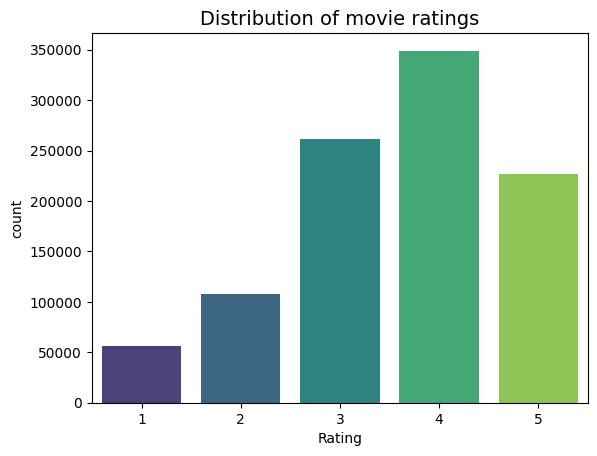

In [10]:
sns.countplot(x="Rating", data=ratings_df, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [12]:
print(f"Mean global rating: {round(ratings_df['Rating'].mean(),2)}.")

mean_ratings = ratings_df.groupby('UserID')['Rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean global rating: 3.58.
Mean rating per user: 3.7.


#MOST FREQUENTLY RATED MOVIES

In [15]:
movie_ratings = ratings_df.merge(movies_df, on='MovieID')
movie_ratings['Title'].value_counts()[0:10]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: count, dtype: int64

#LOWEST AND HIGHEST RATED MOVIES

In [27]:
mean_ratings = ratings_df.groupby('MovieID')[['Rating']].mean()
lowest_rated = mean_ratings['Rating'].idxmin()
movies_df[movies_df['MovieID']==lowest_rated]
highest_rated_movie_name = movies_df.loc[movies_df['MovieID'] == lowest_rated, 'Title'].iloc[0]
print("The highest rated movie is:", highest_rated_movie_name)

The highest rated movie is: Silence of the Palace, The (Saimt el Qusur) (1994)


In [25]:
highest_rated = mean_ratings['Rating'].idxmax()
movies_df[movies_df['MovieID'] == highest_rated]
highest_rated_movie_name = movies_df.loc[movies_df['MovieID'] == highest_rated, 'Title'].iloc[0]
print("The highest rated movie is:", highest_rated_movie_name)

The highest rated movie is: Gate of Heavenly Peace, The (1995)


In [28]:
ratings_df[ratings_df['MovieID']==highest_rated]
ratings_df[ratings_df['MovieID']==lowest_rated]

,UserID,MovieID,Rating,Timestamp
883620,5334,127,1,960795494


#MOVIE GENRES

In [30]:
movies_df['Genres'] = movies_df['Genres'].apply(lambda x: x.split("|"))
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [32]:
from collections import Counter

genre_frequency = Counter(g for genres in movies_df['Genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 18 genres.


Counter({'Drama': 1603,
         'Comedy': 1200,
         'Action': 503,
         'Thriller': 492,
         'Romance': 471,
         'Horror': 343,
         'Adventure': 283,
         'Sci-Fi': 276,
         "Children's": 251,
         'Crime': 211,
         'War': 143,
         'Documentary': 127,
         'Musical': 114,
         'Mystery': 106,
         'Animation': 105,
         'Fantasy': 68,
         'Western': 68,
         'Film-Noir': 44})

#5 MOST COMMON GENRES

In [33]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Drama', 1603), ('Comedy', 1200), ('Action', 503), ('Thriller', 492), ('Romance', 471)]


#GENRE FREQUENCY

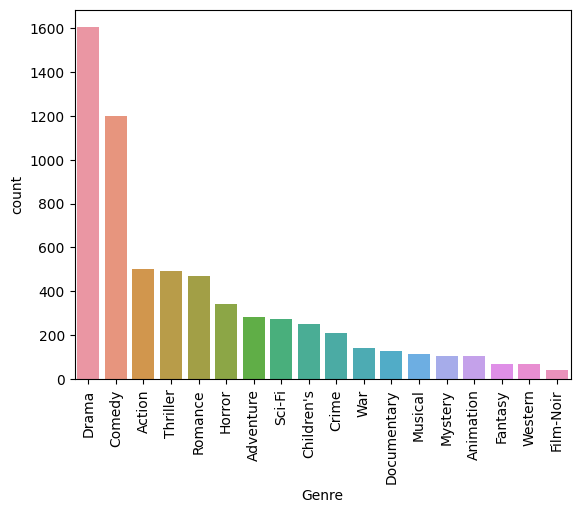

In [35]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['Genre', 'count']

sns.barplot(x='Genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.xticks(rotation=90)
plt.show()

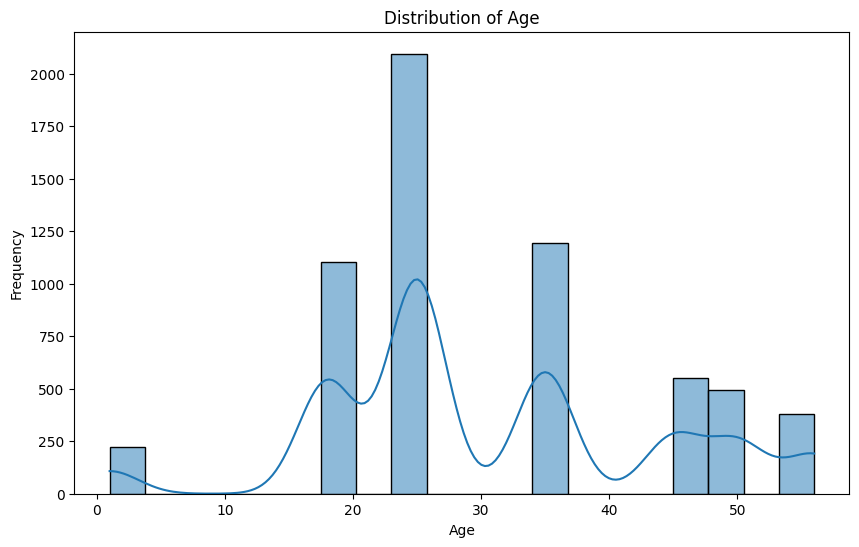

In [36]:
# Plotting distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(users_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

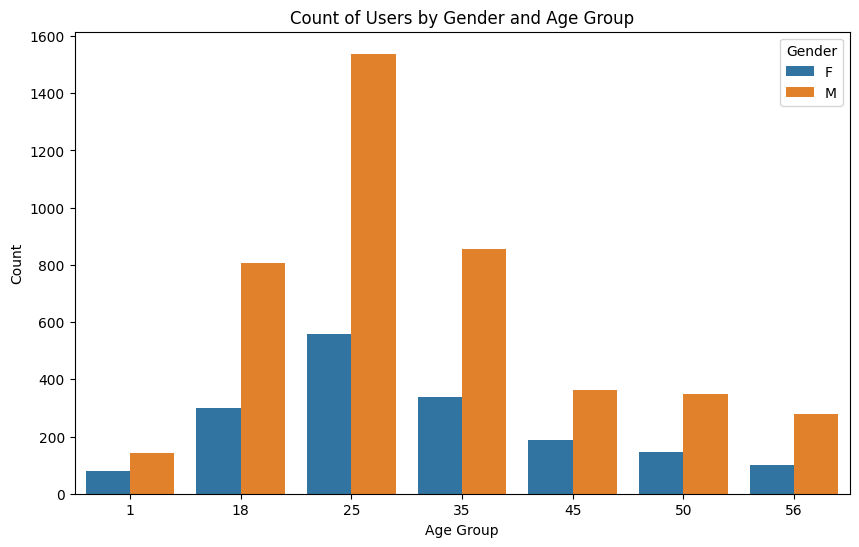

In [37]:
# Plotting count of users by Gender and Age group
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Gender', data=users_df)
plt.title('Count of Users by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

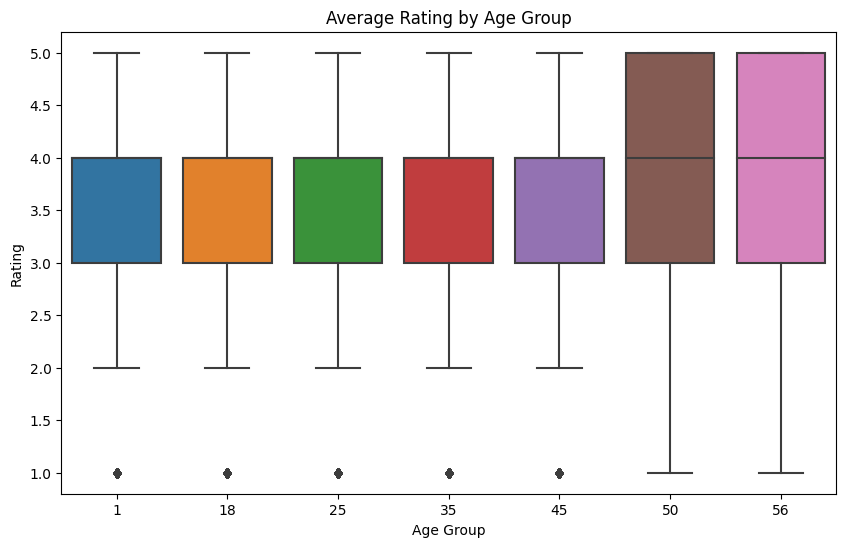

Correlation between Age and Rating: 0.056868661890928617


In [42]:
# Merging ratings_df with users_df on UserID
merged_df = pd.merge(ratings_df, users_df, on='UserID', how='inner')

# Plotting average rating by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Rating', data=merged_df)
plt.title('Average Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Rating')
plt.show()

# Calculating correlation between Age and Rating
age_rating_corr = merged_df['Age'].corr(merged_df['Rating'])
print("Correlation between Age and Rating:", age_rating_corr)


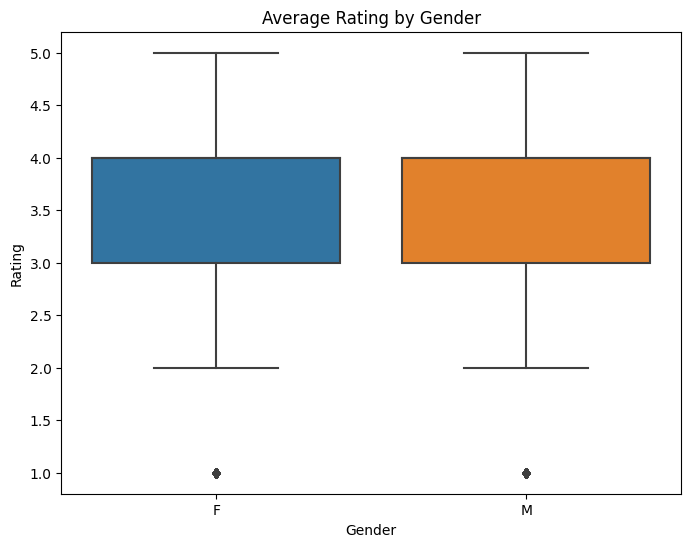

Correlation between Gender and Rating: -0.019860633029310903


In [43]:
# Plotting average rating by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Rating', data=merged_df)
plt.title('Average Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.show()

# Calculating correlation between Gender and Rating
gender_rating_corr = merged_df['Gender'].map({'F': 0, 'M': 1}).corr(merged_df['Rating'])
print("Correlation between Gender and Rating:", gender_rating_corr)


END